<a href="https://colab.research.google.com/github/nsaedae/Colab/blob/master/Ch01.%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EA%B8%B0%EC%B4%88/6_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
"""
날짜 : 2022/04/27
이름 : 김철학
내용 : 파이썬 데이터분석 실습하기
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#데이터 불러오기
df_koweps = pd.read_csv('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/koweps_2015.csv', encoding='euc-kr')
df_koweps

In [6]:
#데이터 크기확인
df_koweps.shape

(16664, 958)

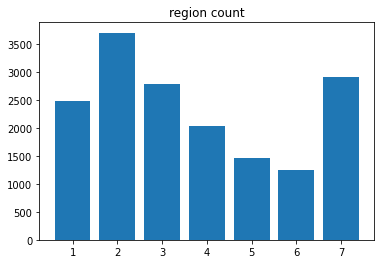

In [20]:
#################################################
#분석주제1.지역별 인구수 분석(지역컬럼:h10_reg7 = 1:서울, 2:경기/인천, 3:부산/경남, 4:대구/경북, 5:대전/충남, 6:강원/충북, 7:광주/전남/전북/제주)
df_local = df_koweps.loc[:,['h10_reg7']]

counts = []
for i in range(1, 8):
  count = df_local[df_local.h10_reg7 == i].h10_reg7.count()
  counts.append(count)

counts

#시각화
plt.title('region count')
plt.bar(['1', '2', '3', '4', '5', '6', '7'],
        counts)
plt.show()

In [27]:
#################################################
#분석주제2.나이대 별 인구분석(나이컬럼:h10_g4)
df_age = df_koweps.loc[:, ['h10_g4', 'h10_g11']]

#파생변수 age, gen 생성
df_age['age'] = 2022 - df_age.h10_g4;

df_age['gen'] = [ 0 if  0 <= a < 10 else 
                 10 if 10 <= a < 20 else 
                 20 if 20 <= a < 30 else 
                 30 if 30 <= a < 40 else 
                 40 if 40 <= a < 50 else 
                 50 if 50 <= a < 60 else 
                 60 if 60 <= a < 70 else 
                 70 if 70 <= a < 80 else 
                 80 if 80 <= a < 90 else 
                 90 if 90 <= a < 100 else 100 for a in df_age['age']]

df_age                 





,h10_g4,h10_g11,age,gen
0,1936,2,86,80
1,1945,2,77,70
2,1948,2,74,70
3,1942,1,80,80
4,1923,1,99,90
...,...,...,...,...
16659,1967,1,55,50
16660,1992,1,30,30
16661,1995,1,27,20
16662,1998,1,24,20


In [ ]:
#################################################
#분석주제3.나이대 별 소득분포(소득컬럼:p1002_8aq1)
